<a href="https://colab.research.google.com/github/junghyeon0114/deep_tensorflow/blob/main/ch3_4%2C_6~7_Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝 텐서플로 ch3. 4, 6~7

pg. 87 ~ 95, 105 ~ 115



04) 모델 세부 설정

앞에서 다룬 mnist 데이터셋 사용. 데이터 정규화까지 처리하여 입력 데이터 준비

In [3]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#로드된 데이터셋 확인
print('train set:' , x_train.shape, y_train.shape)
print('test set:' , x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train/ x_train.max()  # max:255
x_test = x_test / x_test.max()    # max: 255

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


1. 초기값 설정


In [7]:
dense = tf.keras.layers.Dense(236, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

In [11]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal,activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


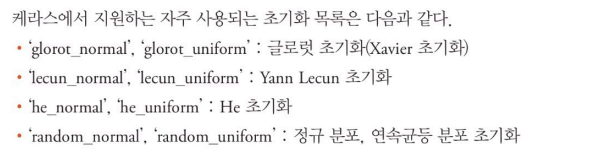

2. 규제

모델의 과대적합 해소 위해 L1 L2 rbwp wjrdyd

In [12]:
# 기본값
dense=tf.keras.layers.Dense(256,activation='relu')
dense.get_config()

{'name': 'dense_6',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [15]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용 , alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])


{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


3. 드롭아웃

딥러닝의 과대적합 문제를 해결하기 위해 제안된 아이디어, 실무적으로 상당히 좋은 효과

In [17]:
# dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

4. 배치 정규화

각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일 정규화. 다음층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 간으하고 성능 크게 향상 가능.

배치 정규화 층은 케라스에서 클래스 함수로 지우너하기 때문에 별도로 코드를 구현할 필요가 없고, 클래스 인스턴스를 생성하여 추가해주면 된다.

In [19]:
# Model A : Dense + ReLU
model_a = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')

])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    #여기서 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

-> 배치 정규화 추가시 손실은 이전 대비 더 안정적이고 빠르게 수렴.

5. 활성화 함수

인스턴스로 선언하여 하이퍼파리미터 값을 변경해 적용

In [22]:
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [23]:
#model C: Dense + BatchNorm + LeakyReLU(0,2)
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

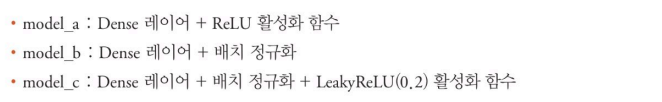

In [24]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A : Dense + ReLU
history_a=model_a.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model B : Dense + BatchNorm + ReLU
history_b=model_b.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model C : Dense + BatchNorm + LeakyReLU(0,2)
history_c=model_c.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2946 - accuracy: 0.9148 - val_loss: 0.1746 - val_accuracy: 0.9442
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1313 - accuracy: 0.9610 - val_loss: 0.1122 - val_accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0965 - accuracy: 0.9705 - val_loss: 0.1005 - val_accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0776 - accuracy: 0.9757 - val_loss: 0.1023 - val_accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0637 - accuracy: 0.9804 - val_loss: 0.0996 - val_accuracy: 0.9702
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.0986 - val_accuracy: 0.9701
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 0.1019 - val_accuracy

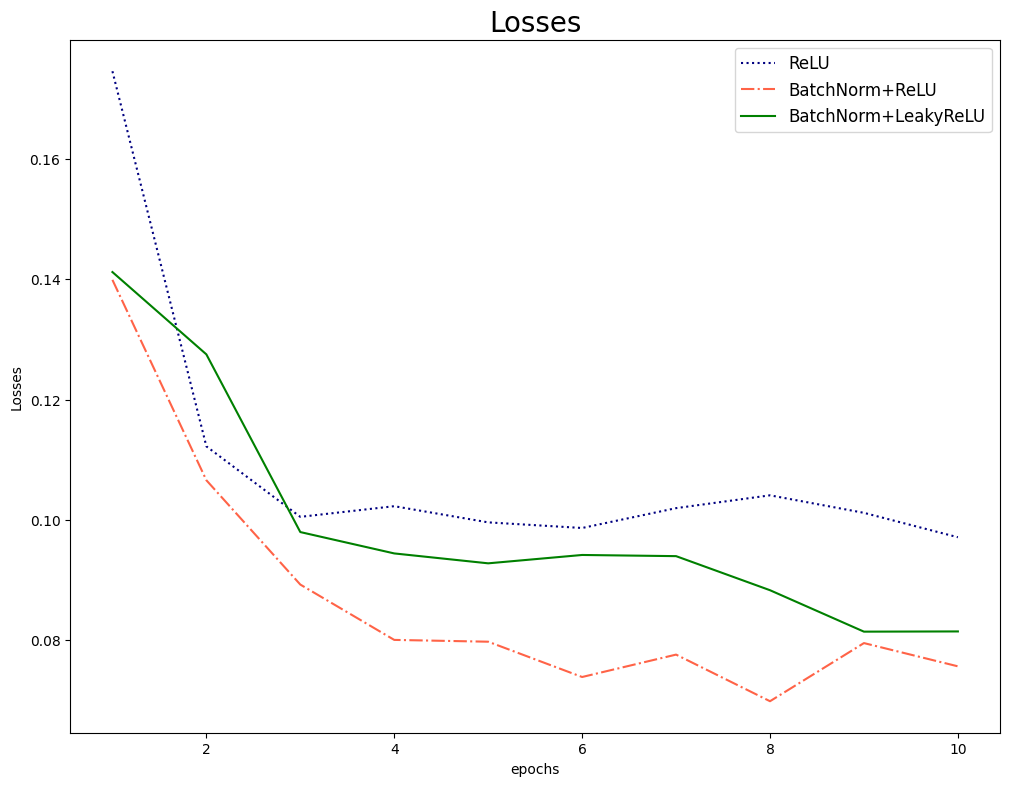

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

-> 모델별 차이가 크지 않음

06) 모델 저장 및 불러오기

In [38]:
# 모델명을 h5 포맷으로 저장
model_b.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2. 저장된 모델 복원

In [39]:
# 모델 복원
h5_model=tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [40]:
# 모델 검증 : 손실함수와 평가지표
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07565, acc: 0.97740


In [41]:
# 모델을 SavedModel 포맷으로 저장
model_b.save('saved-model')

In [43]:
# 모델 복원
saved_model=tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [44]:
#모델 검증 (HDF5 포맷)
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

#모델 검증 (SavedModel 포맷)
loss, acc=saved_model.evaluate(x_test, y_test, verbose= 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07565, acc: 0.97740
saved_model] loss: 0.07565, acc: 0.97740


07) 복잡한 모델 생성

In [45]:
import tensorflow as tf

#모델의 레이어를 체인 구조로 연결 input 레이어 정의
input_layer=tf.keras.Input(shape=(28, 28), name='InputLayer')

#모델의 레이어를 체인 구조로 연결
x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [46]:
#모델 생성
func_model=tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


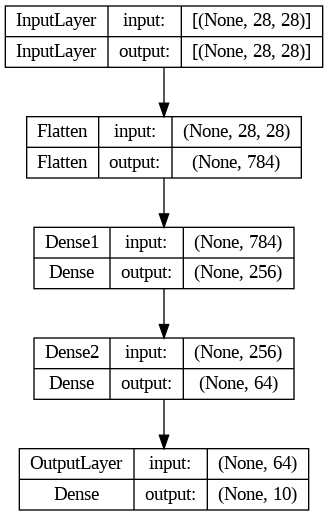

In [47]:
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [48]:
#컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

#검증
loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2108 - accuracy: 0.9370
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0860 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0587 - accuracy: 0.9816
Functional Model] loss: 0.07685, acc: 0.97680


2. 모델 서브클래싱



In [49]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256, activation='relu')
    self.dense2=tf.keras.layers.Dense(64, activation='relu')
    self.dense3=tf.keras.layers.Dense(10, activation='softmax')

  #method overiding
  #훈련용 함수 정의
  #x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

In [50]:
#모델 생성
mymodel=MyModel()

#모델의 이름 설정
mymodel._name='subclass_model'

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_22 (Dense)            multiple                  200960    
                                                                 
 dense_23 (Dense)            multiple                  16448     
                                                                 
 dense_24 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2082 - accuracy: 0.9389
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0861 - accuracy: 0.9725
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0597 - accuracy: 0.9814
Subclassing Model] loss: 0.07084, acc: 0.97900


3. 서브클래싱 모델 파라미터를 활용한 생성

다음은 모델 생성자 파라미터 추가해 동적으로 레이어 유닛 개수 초기화

In [52]:
class MyModel(tf.keras.Model):

  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

In [53]:
# 모델 생성
mymodel=MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_25 (Dense)            multiple                  200960    
                                                                 
 dense_26 (Dense)            multiple                  16448     
                                                                 
 dense_27 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2124 - accuracy: 0.9372
Epoch 2/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0882 - accuracy: 0.9725
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0623 - accuracy: 0.9804
Subclassing Model w.parameters] loss: 0.07569, acc: 0.97700
